# Evaluación 3

## Ejercicio 1

### 1.1 Check if your country is a polygon or multipolygon

In [84]:
import os
import geopandas as gpd
from  fiona import listlayers
import matplotlib.pyplot as plt

In [85]:
peruMaps = "https://github.com/IntroSpatialDataScience/geodfEv3/raw/main/maps/peru_24891.gpkg"

In [86]:
listlayers(peruMaps)

['country', 'cities', 'rivers']

In [87]:
#Obtenemos cada mapa:
peru = gpd.read_file(peruMaps,layer="country")
peru_cities = gpd.read_file(peruMaps,layer = "cities")
peru_rivers = gpd.read_file(peruMaps,layer = "rivers")

In [88]:
#Luego, notamos que Peru es un POLIGONO
peru

,COUNTRY,geometry
0,Peru,"POLYGON ((1423874.178 857804.844, 1423768.489 ..."


### 1.2 Recover just the boundaries of that country

In [89]:
#Notamos que el borda está formado por una sola línea
peru.boundary

0    LINESTRING (1423874.178 857804.844, 1423768.48...
dtype: geometry

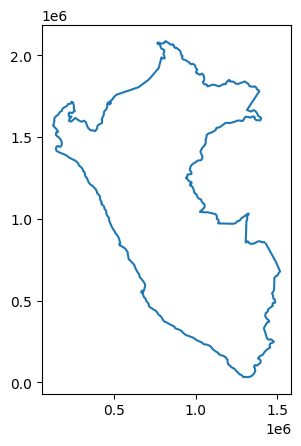

In [90]:
peru.boundary.plot()
plt.show()

### 1.3 Turn the boundary into a GDF

In [91]:
type(peru.boundary)

geopandas.geoseries.GeoSeries

In [92]:
peru.boundary.to_frame()

,0
0,"LINESTRING (1423874.178 857804.844, 1423768.48..."


In [93]:
peru_boundary = peru.boundary.to_frame()

In [94]:
peru_boundary["name"]="Peru"
peru_boundary

,0,name
0,"LINESTRING (1423874.178 857804.844, 1423768.48...",Peru


In [95]:
peru_boundary.rename(columns={0:"geometry"},inplace=True)
peru_boundary = peru_boundary.set_geometry("geometry")
peru_boundary

,geometry,name
0,"LINESTRING (1423874.178 857804.844, 1423768.48...",Peru


## Ejercicio 2

De aquí extraje el archivo shp de los bordes de Perú [here](https://data.humdata.org/dataset/cod-ab-per)

### 2.1 Look for sub administrative divisions of your country

In [96]:
peru_dep = gpd.read_file(os.path.join("maps","per_adm_ign_20200714_shp","per_admbnda_adm1_ign_20200714.shp"))
#peru_dep.plot()

In [97]:
peru_mun = gpd.read_file(os.path.join("maps","per_adm_ign_20200714_shp","per_admbnda_adm2_ign_20200714.shp"))
#peru_mun.plot()

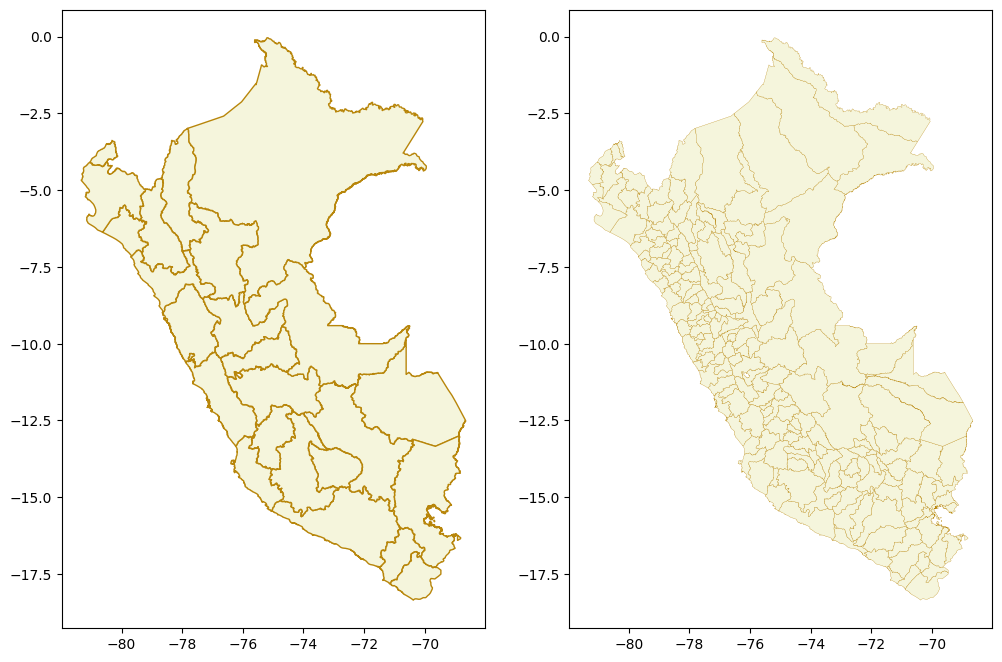

In [98]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

peru_dep.plot(ax=ax1, facecolor='beige', edgecolor='darkgoldenrod')
peru_mun.plot(ax=ax2, facecolor='beige', edgecolor='darkgoldenrod',linewidth=0.2)
plt.show()

### 2.2 Check all the CRSs of those divisions

In [99]:
peru_dep.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [100]:
peru_mun.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [101]:
peru_dep.geometry.head() # efectivamente son mapas no proyectados con crs 4326

0    POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...
1    POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...
2    POLYGON ((-73.74632 -13.17456, -73.74570 -13.1...
3    POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...
4    POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...
Name: geometry, dtype: geometry

### 2.3 If you find one CRS is missing, fill the CRS with the right projection

In [102]:
# Como los dos tienen CRS 4326, ahora los reproyectaré para que tengan unidades de longitud
peru_dep = peru_dep.to_crs(24891)
peru_mun = peru_mun.to_crs(24891)

peru_dep.crs

<Projected CRS: EPSG:24891>
Name: PSAD56 / Peru west zone
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Peru - west of 79°W.
- bounds: (-81.41, -8.32, -79.0, -3.38)
Coordinate Operation:
- name: Peru west zone
- method: Transverse Mercator
Datum: Provisional South American Datum 1956
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

## Ejercicio 3

### 3.1 Look for some points in a CSV file about your country.

In [103]:
import pandas as pd
infohealth = pd.read_csv(os.path.join("data","peru_health_sities.csv"))

infohealth.head()

,X,Y,osm_id,osm_type,completeness,#meta +operator,#meta +health_amenity_type,#meta+dispensing,#meta +speciality,#meta+is_in_health_zone,...,addr_postcode,#meta+water_source,addr_city,#meta+wheelchair,#capacity +beds,changeset_user,#geo+bounds+url,addr_housenumber,#meta+healthcare,#loc +name
0,-75.506386,-11.895442,7061666697,node,15,Gobierno Regional,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,karitotp_peruimport,NaN,NaN,NaN,Patacancha
1,-76.125374,-10.247465,7073535192,node,12,Gobierno Regional,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,karitotp_peruimport,NaN,NaN,NaN,Ayancocha Alta
2,-73.034027,-12.525074,6867639865,node,12,Gobierno Regional,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,karitotp_peruimport,NaN,NaN,NaN,Kamanquiriato
3,-75.890124,-13.723504,6347881785,node,15,Gobierno Regional,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,karitotp_peruimport,NaN,NaN,NaN,C.S. Humay
4,-75.215294,-12.072449,5043483801,node,15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Baconcrisp,Reconocimiento terrestre cartográfico realizad...,NaN,NaN,Farmacia Mafer


In [104]:
col=['X','Y','#meta +operator','#loc +name','osm_id']
infohealth=infohealth.loc[:,col]
infohealth

,X,Y,#meta +operator,#loc +name,osm_id
0,-75.506386,-11.895442,Gobierno Regional,Patacancha,7061666697
1,-76.125374,-10.247465,Gobierno Regional,Ayancocha Alta,7073535192
2,-73.034027,-12.525074,Gobierno Regional,Kamanquiriato,6867639865
3,-75.890124,-13.723504,Gobierno Regional,C.S. Humay,6347881785
4,-75.215294,-12.072449,NaN,Farmacia Mafer,5043483801
...,...,...,...,...,...
13777,-79.001803,-8.085416,NaN,Prodent,5087303549
13778,-74.226451,-13.160537,NaN,Mifarma,3717393199
13779,-76.052600,-11.151853,Gobierno Regional,Sasicucho,7039407129
13780,-79.007135,-8.112350,NaN,Botica Alva,5086928457


In [105]:
infohealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13782 entries, 0 to 13781
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                11657 non-null  float64
 1   Y                11657 non-null  float64
 2   #meta +operator  7191 non-null   object 
 3   #loc +name       13189 non-null  object 
 4   osm_id           13782 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 538.5+ KB


In [106]:
infohealth.rename(columns={'#loc +name':'localizacion'},inplace=True)

In [107]:
infohealth

,X,Y,#meta +operator,localizacion,osm_id
0,-75.506386,-11.895442,Gobierno Regional,Patacancha,7061666697
1,-76.125374,-10.247465,Gobierno Regional,Ayancocha Alta,7073535192
2,-73.034027,-12.525074,Gobierno Regional,Kamanquiriato,6867639865
3,-75.890124,-13.723504,Gobierno Regional,C.S. Humay,6347881785
4,-75.215294,-12.072449,NaN,Farmacia Mafer,5043483801
...,...,...,...,...,...
13777,-79.001803,-8.085416,NaN,Prodent,5087303549
13778,-74.226451,-13.160537,NaN,Mifarma,3717393199
13779,-76.052600,-11.151853,Gobierno Regional,Sasicucho,7039407129
13780,-79.007135,-8.112350,NaN,Botica Alva,5086928457


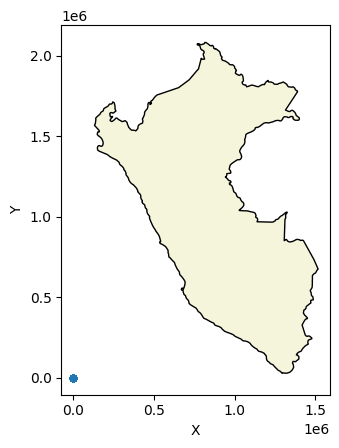

In [108]:
base = peru.plot(color='beige', edgecolor='black')
infohealth.plot.scatter(x = 'X', y = 'Y',ax=base)
plt.show()

### 3.2 Turn those points into a spatial object

In [109]:
#Solucionamos esto dándole un crs al conjunto de puntos
healthsites=gpd.GeoDataFrame(data=infohealth.copy(),geometry=gpd.points_from_xy(infohealth.X,infohealth.Y),crs=4326)

In [110]:
healthsites = healthsites.to_crs(24891)

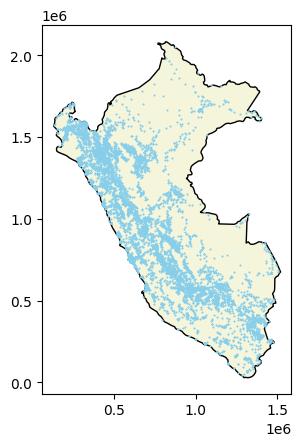

In [111]:
base = peru.plot(color='beige', edgecolor='black')
healthsites.plot(ax=base,edgecolor='skyblue',marker='*',markersize=0.2)
plt.show()

In [112]:
type(healthsites)

geopandas.geodataframe.GeoDataFrame

### 3.3 Save the layer.

In [113]:
healthsites.to_file(os.path.join("maps","peru_health_24891.gpkg"), layer='healthsites', driver="GPKG")

In [114]:
peru_health='https://github.com/IntroSpatialDataScience/geodfEv3/raw/main/maps/peru_health_24891.gpkg'

In [83]:
from  fiona import listlayers

listlayers(peru_health)

DriverError: '/vsicurl/https://github.com/IntroSpatialDataScience/geodfEv3/raw/main/maps/peru_health_24891.gpkg' does not exist in the file system, and is not recognized as a supported dataset name.